In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string


In [24]:
train_set = pd.read_csv("C:\\Users\\KRISHNA DHOBALE\\Downloads\\archive1\\Google_Stock_Price_Train.csv")
test_set = pd.read_csv("C:\\Users\\KRISHNA DHOBALE\\Downloads\\archive1\\Google_Stock_Price_Test.csv")
train_set

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [28]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   float64
 5   Volume  1258 non-null   object 
dtypes: float64(4), object(2)
memory usage: 59.1+ KB


In [27]:
train_set['Close'] = [float(element.replace(",", "")) for element in train_set['Close']]

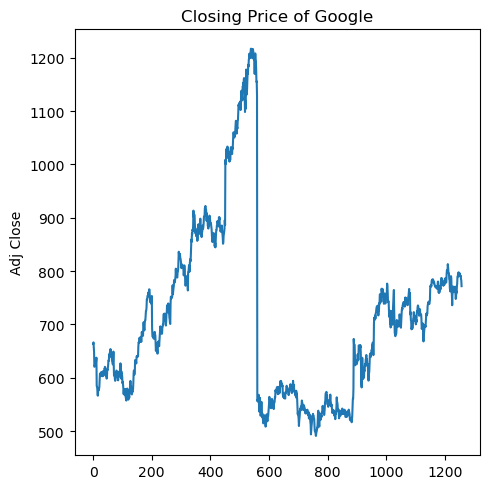

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
plt.subplots_adjust(top=1.25, bottom=1.2)
train_set['Close'].plot()
plt.ylabel('Adj Close')
plt.xlabel(None)
plt.title(f"Closing Price of Google")
plt.tight_layout()

In [31]:
train_set['Volume'] = [int(element.replace(",", "")) for element in train_set['Volume']]

Text(0.5, 1.0, 'Closing Price of Google')

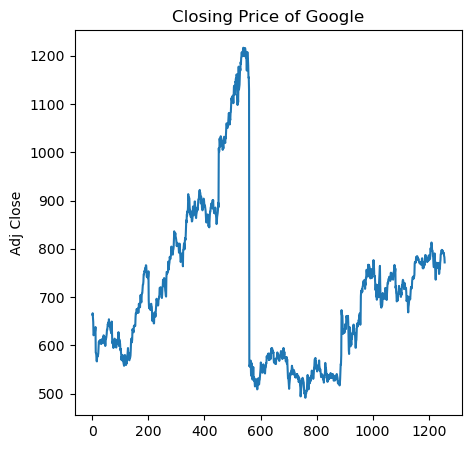

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
#plt.subplots_adjust(top=1.25, bottom=1.2)
train_set['Close'].plot()
plt.ylabel('Adj Close')
plt.xlabel(None)
plt.title(f"Closing Price of Google")
 

In [34]:
train_set=train_set.iloc[:,1:2].values

In [35]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(train_set)
X_train= training_set[0:1257]
y_train= training_set[1:1258]
X_train=np.reshape(X_train, (1257 , 1 , 1))

In [36]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [40]:
regressor = Sequential()

regressor.add(LSTM(units=4, activation= 'sigmoid', input_shape= (None,1)))

regressor.add(Dense( units=1 ))

regressor.compile(optimizer='adam', loss='mean_squared_error')
regressor.fit(X_train, y_train, batch_size=32, epochs=200)

Epoch 1/200
40/40 [==============================] - 3s 4ms/step - loss: 0.5549
Epoch 2/200
40/40 [==============================] - 0s 3ms/step - loss: 0.4226
Epoch 3/200
40/40 [==============================] - 0s 3ms/step - loss: 0.3213
Epoch 4/200
40/40 [==============================] - 0s 3ms/step - loss: 0.2443
Epoch 5/200
40/40 [==============================] - 0s 3ms/step - loss: 0.1881
Epoch 6/200
40/40 [==============================] - 0s 3ms/step - loss: 0.1471
Epoch 7/200
40/40 [==============================] - 0s 3ms/step - loss: 0.1177
Epoch 8/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0972
Epoch 9/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0834
Epoch 10/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0742
Epoch 11/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0683
Epoch 12/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0645
Epoch 13/200
40/40 [=================

In [41]:
real_stock_price = test_set.iloc[:,1:2].values

inputs = real_stock_price
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (20 , 1, 1))
predicted_stock_price = regressor.predict(inputs)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 0s 360ms/step


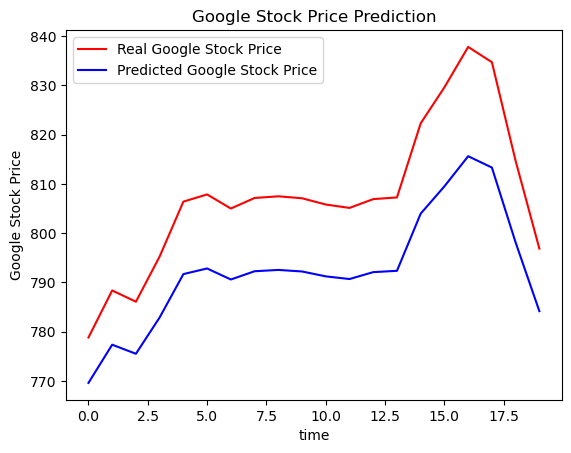

In [45]:
plt.plot( real_stock_price , color = 'red' , label = 'Real Google Stock Price')
plt.plot( predicted_stock_price , color = 'blue' , label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel( 'time' )
plt.ylabel( 'Google Stock Price' )
plt.legend()
plt.show()